### John D'Souza, Student ID: z5389733
--------------------------------------------

## Common routines

### Load all the packages required

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from numpy import *  
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import os
import datetime

### Function for reading data

In [2]:
def read_data(datafile):
    df_data = pd.read_csv(datafile, sep = ',')
    return df_data

### Function for reducing dataset into feature (predictor) and response variable sets

In [15]:
def prep_data(df_data):
    # Split dataset into a 'features' and a 'response' dataset      
    df_reduced = df_data[["degree_days", "pv_capacity", "population", "demand_avg_daily_max"]]
    df_features = df_reduced.iloc[ : , 0:-1]
    df_response = df_reduced.iloc[: , -1]
    return df_features, df_response, df_reduced

### Function for normalising features

In [4]:
def normalise_features(data):
    transformer = Normalizer().fit(data) 
    data = transformer.transform(data)
    return data

### Function for splitting data randomly

In [5]:
def data_split_random(data_x, data_y, portion, exp_num):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=portion, random_state=exp_num)
    return x_train, x_test, y_train, y_test

### Function for Linear Model fitting with sklearn

In [6]:
def sklearn_linear_mod(x_train, x_test, y_train, y_test): 
 
    regression = linear_model.LinearRegression()

    # Train the model using the training sets
    regression.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred_test = regression.predict(x_test)
 
    # Calculate root mean squared error of testing set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))  

    # Calculate r-squared of testing set
    rsquared_test = r2_score(y_test, y_pred_test)

    # Calculate mean absolute percentage error of testing set
    mape_test =  mean_absolute_percentage_error(y_test, y_pred_test)*100
 
    # Visualise residual
    residuals = y_pred_test - y_test
    #plt.plot(residuals)
    #plt.title("Regression Residuals")
    #plt.savefig('residuals_linear_reg.png')

    # Make predictions using the training set
    y_pred_train = regression.predict(x_train)

     # Calculate root mean squared error of training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  

    # Calculate r-squared of training set
    rsquared_train = r2_score(y_train, y_pred_train) 

    # Calculate mean absolute percentage error of training set
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100

    return rmse_test, rsquared_test, mape_test, rmse_train, rsquared_train, mape_train, regression.coef_, residuals

### Function for iterative experiments of Linear Regression Models  

In [7]:
def run_experiments(features, response, norm_flag, max_experiments, train_split, figure_dir ):
    # This function expects an ndarray for features and response

    # Initialise lists for storing measures of regression loss and fit
    rmse_test_list = np.zeros(max_experiments)
    rmse_train_list = np.zeros(max_experiments)
    rsq_test_list = np.zeros(max_experiments)
    rsq_train_list = np.zeros(max_experiments)
    mape_test_list = np.zeros(max_experiments)
    mape_train_list = np.zeros(max_experiments)
    
    # Normalise features if necessary
    if norm_flag == True:
        features = normalise_features(features)   

    # For each experiment ..
    for i in range(0,max_experiments):

        # Create train/test split of features and response
        x_train, x_test, y_train, y_test = data_split_random(features, response, train_split, i)
    
        # Fit the sklearn linear_model with training data and predict responses with test data.
        # Visualise model prediction
        rmse_test_list[i], rsq_test_list[i], mape_test_list[i], rmse_train_list[i], rsq_train_list[i], mape_train_list[i], coef, residuals = sklearn_linear_mod(x_train, x_test, y_train, y_test)
        
        plt.clf()
        fig_name = 'Regression Residuals Experiment '+ str(i)
        file_name = 'regression_residuals_experiment_'+ str(i)
        plt.plot(residuals)
        plt.title(fig_name)
        plt.savefig(figure_dir + file_name)

    #Calculate Mean and Standard Deviation of RMSE and R-squared score for testing set
    mean_rmse_test = np.mean(rmse_test_list)
    std_rmse_test = np.std(rmse_test_list)
    mean_rsq_test = np.mean(rsq_test_list)
    std_rsq_test = np.std(rsq_test_list)
    mean_mape_test = np.mean(mape_test_list)
    std_mape_test = np.std(mape_test_list)

    #Calculate Mean and Standard Deviation of RMSE and R-squared score for training set
    mean_rmse_train = np.mean(rmse_train_list)
    std_rmse_train = np.std(rmse_train_list)
    mean_rsq_train = np.mean(rsq_train_list)
    std_rsq_train = np.std(rsq_train_list)
    mean_mape_train = np.mean(mape_train_list)
    std_mape_train = np.std(mape_train_list)

    return  rmse_test_list, mean_rmse_test, std_rmse_test, \
            rsq_test_list, mean_rsq_test, std_rsq_test, \
            mape_test_list, mean_mape_test, std_mape_test, \
            rmse_train_list, mean_rmse_train, std_rmse_train, \
            rsq_train_list, mean_rsq_train, std_rsq_train, \
            mape_train_list, mean_mape_train, std_mape_train, \
            coef 

### Function for making directory to store outputs

In [13]:
# Reference: www.stackoverflow.com

def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

OBSERVATIONS:
- We might need to remove outliers prior to training a model.

## Read pre-processed multi-variable dataset

#### Set python variables

In [8]:
fpath = "..\\data\\all_raw_files"
fname_model_data = "model_data.csv"

# Set the period of forecast from 2010 to 2020
start_mth = datetime.datetime(2010, 1, 1)
end_mth = datetime.datetime(2020, 12, 1)

#### Read dataset into pandas dataframe

In [9]:
# Read file
df_model_data = read_data(f'{fpath}\{fname_model_data}')

# Convert date column to datetime datatype
df_model_data['date'] = pd.to_datetime(df_model_data['date'])

# Filter records within start and end month
df_model_data = df_model_data[( df_model_data['date']>=start_mth) & (df_model_data['date'] <= end_mth)]

In [10]:
df_model_data

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
0,2010,1,2010-01-01,20.868008,1.6,41.1,16.380645,25.858065,144.511358,8941.450389,13765.04,10613.530000,6554083.135,28278.392,7110454,44504.250000
1,2010,2,2010-02-01,20.218907,3.2,35.4,16.146429,24.682143,124.982743,8855.467677,13377.27,10380.667857,5831325.465,32153.986,7119405,44504.250000
2,2010,3,2010-03-01,19.828286,6.3,34.7,15.496774,24.725806,106.809763,8698.725127,11991.47,10132.978710,6319623.805,38195.588,7128356,44504.250000
3,2010,4,2010-04-01,17.593856,6.5,29.9,12.780000,23.063333,68.136038,8452.863411,11436.13,9804.072333,5984627.295,45142.723,7133668,44504.250000
4,2010,5,2010-05-01,15.323485,3.1,28.4,11.187097,19.596774,123.937772,8897.770510,12386.49,10558.023548,6459781.390,54370.332,7138980,44504.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020,8,2020-08-01,14.613374,2.2,27.8,9.093548,20.074194,130.397917,7827.362594,11500.53,9764.800000,5823557.770,2969007.614,8102807,56109.666667
128,2020,9,2020-09-01,16.460153,4.9,30.5,11.330000,21.723333,81.650543,7326.909750,11721.16,9027.053000,5268048.110,3054829.298,8098905,56109.666667
129,2020,10,2020-10-01,17.598051,7.0,30.2,13.467742,21.980645,68.068750,7340.289409,11920.34,8757.940323,5461175.320,3137388.115,8097370,56109.666667
130,2020,11,2020-11-01,20.184861,6.5,40.4,14.886667,25.863333,114.450000,7584.268118,12401.82,9291.636333,5460673.045,3234844.871,8095835,56109.666667


### Solution to Data Processing Task 1: 

T. 

In [16]:

# Prepare dataset into 'features' and 'response'
df_features, df_response, df_model_reduced = prep_data(df_model_data)

print(df_model_reduced)

     degree_days  pv_capacity  population  demand_avg_daily_max
0     144.511358    28278.392     7110454          10613.530000
1     124.982743    32153.986     7119405          10380.667857
2     106.809763    38195.588     7128356          10132.978710
3      68.136038    45142.723     7133668           9804.072333
4     123.937772    54370.332     7138980          10558.023548
..           ...          ...         ...                   ...
127   130.397917  2969007.614     8102807           9764.800000
128    81.650543  3054829.298     8098905           9027.053000
129    68.068750  3137388.115     8097370           8757.940323
130   114.450000  3234844.871     8095835           9291.636333
131   104.077083  3340420.498     8094300           8608.121290

[132 rows x 4 columns]


### Solution to Data Processing Task 2: 

TASK: Develop a correlation map using a heatmap and discuss major observations

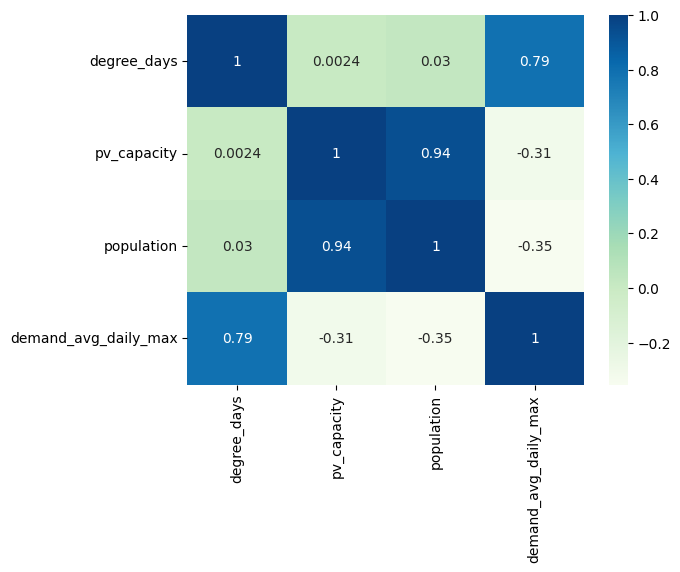

In [17]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\"
mkdir_p(figure_dir)

# Set figure file name
figure_file_name = 'corr_map_heatmap.png'

# Plot a Seaborn heatmap of the correlation matrix from the abalone dataframe
sns.heatmap(df_model_reduced.corr(), cmap="GnBu", annot=True)
plt.savefig(figure_dir + figure_file_name)

OBSERVATIONS: 
- 

### Solution to Data Processing Task 3

TASK: Pick two of the most correlated features (negative or positive) and create a scatter plot with demand. Discuss major observations 

In [34]:
# List features by highest absolute value of correlation with rings
absolute_corr_with_demand = df_model_reduced.corr()['demand_avg_daily_max'].apply(abs).sort_values(ascending=False)
print(absolute_corr_with_demand)

demand_avg_daily_max    1.000000
degree_days             0.787922
population              0.353260
pv_capacity             0.307144
Name: demand_avg_daily_max, dtype: float64


OBSERVATION: 
.

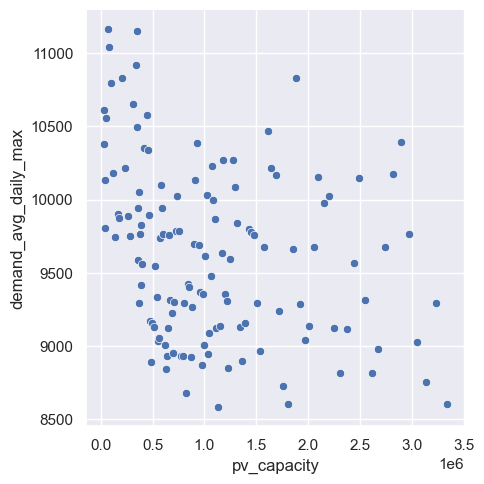

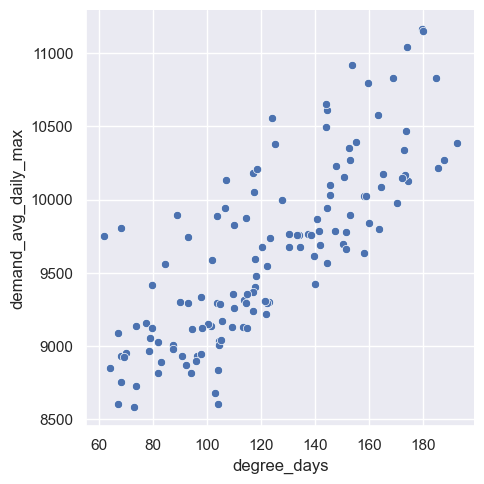

In [35]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\"
mkdir_p(figure_dir)

# Set figure file name
figure_file_name = 'scatter_pv_capacity_demand.png'

# Create scatter plots of shell_w and diameter with rings, differentiating the 'sex' by colour
sns.set()
sns.relplot( 
    data = df_model_reduced, 
    kind = 'scatter', 
    x = 'pv_capacity',
    y = 'demand_avg_daily_max',
    #hue = 'sex' # Specify colours for the points
)
plt.savefig(figure_dir + figure_file_name)

# Set figure file name
figure_file_name = 'scatter_degree_days_demand.png'

sns.relplot( 
    data = df_model_reduced, 
    kind = 'scatter', 
    x = 'degree_days',
    y = 'demand_avg_daily_max',
    #hue = 'sex' # Specify colours for the points
)
plt.savefig(figure_dir + figure_file_name)


OBSERVATIONS:
- 

### Solution to Data Processing Task 4

TASK: Create histograms of the two most correlated features, and the demand. What are the major observations?  

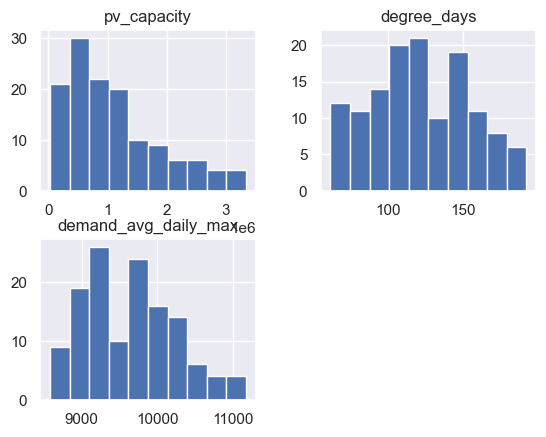

In [36]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\"
mkdir_p(figure_dir)

# Set figure file name
figure_file_name = 'hist_pv_capacity_degree_days_demand.png'

#Create histograms for shell_w, diameter and rings
cols = ['pv_capacity','degree_days','demand_avg_daily_max']
df_model_reduced.hist(column=cols)
plt.savefig(figure_dir + figure_file_name)

OBSERVATIONS:
- 

### Solution to Data Processing Task 5 

TASK: Create a 60/40 train/test split - which takes a random seed based on the experiment number to create a new dataset for every experiment.

In [37]:
#Set maximum number of experiments and train split ratio.
max_experiments = 5
train_split = 0.6

#Create train/test datasets for features and response for each experiment
for i in range(0,max_experiments):
    x_train, x_test, y_train, y_test = data_split_random(df_features.to_numpy(), df_response.to_numpy(), train_split, i)
    print('x_train for experiment number ',i, ' rows :', len(x_train))
    print('x_test  for experiment number ',i, ' rows :', len(x_test))
    print('y_train for experiment number ',i, ' rows :', len(y_train))
    print('y_test  for experiment number ',i, ' rows :', len(y_test))


x_train for experiment number  0  rows : 79
x_test  for experiment number  0  rows : 53
y_train for experiment number  0  rows : 79
y_test  for experiment number  0  rows : 53
x_train for experiment number  1  rows : 79
x_test  for experiment number  1  rows : 53
y_train for experiment number  1  rows : 79
y_test  for experiment number  1  rows : 53
x_train for experiment number  2  rows : 79
x_test  for experiment number  2  rows : 53
y_train for experiment number  2  rows : 79
y_test  for experiment number  2  rows : 53
x_train for experiment number  3  rows : 79
x_test  for experiment number  3  rows : 53
y_train for experiment number  3  rows : 79
y_test  for experiment number  3  rows : 53
x_train for experiment number  4  rows : 79
x_test  for experiment number  4  rows : 53
y_train for experiment number  4  rows : 79
y_test  for experiment number  4  rows : 53


### Solution to Data Processing Task 6

TASK: Add any other visualisation of the dataset you find appropriate (OPTIONAL).

Explore outliers in values for the two most correlated features with respect to rings: pv_capacity and temp_mean.
From the scatter plots it appears that outliers exist for pv_capacity and temp_mean so we'll create a boxplot for this range.

In [38]:
# Create directory for saving figure files
#figure_dir = "fig\\linear_model\\"
#mkdir_p(figure_dir)

# Set figure file name

#figure_file_name = 'boxplot_pv_capacity_demand.png'

#demand_for_boxplot = df_model_reduced[(df_model_reduced['demand_mean_max'] >8250) & (df_model_reduced['demand_mean_max'] < 11000)]

#Create boxplot for pv_capacity

#sns.boxplot(x="demand_mean_max",y="pv_capacity", data=demand_for_boxplot)
#plt.savefig(figure_dir + figure_file_name)

In [39]:
# Set figure file name
#figure_file_name = 'boxplot_diameter_rings.png'

#Create boxplot for diameter
#sns.boxplot(x="rings",y="diameter", hue='sex',data=abalone_for_boxplot)
#plt.savefig(figure_dir + figure_file_name)

OBSERVATIONS:
- We might need to remove outliers prior to training a model.



## Modelling Tasks

### Solution to Modelling Task 1: 

TASK: Develop a linear regression model using all features for demand using 60 percent of data picked randomly for training and remaining for testing. Visualise your model prediction using appropriate plots. Report the RMSE and R-squared score. 

RMSE:  315.4276287662852
R-Squared:  0.7069684630386406
MAPE:  2.7389775827782046


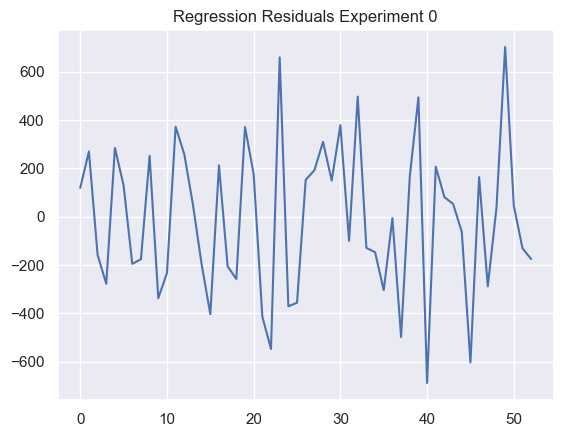

In [63]:
# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task_1\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = False

#Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, mape_test_list, _, _,_, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        df_features.to_numpy(), 
                                                                        df_response.to_numpy(), 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir)

print('RMSE: ', rmse_test_list[0])
print('R-Squared: ', rsq_test_list[0])
print('MAPE: ', mape_test_list[0])

### Solution to Modelling Task 2: 

TASK: Develop a linear regression model with all input features, i) without normalising input data, ii) with normalising input data. 

RMSE without normalisation:  315.4276287662852
R-Squared without normalisation:  0.7069684630386406
MAPE without normalisation:  2.7389775827782046


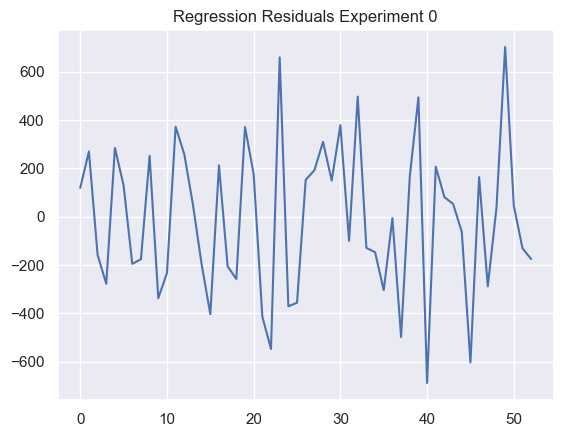

In [64]:
# Read data

# Prepare features and response
features = df_features.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task_2\\without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = False

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, mape_test_list, _, _, _, _, _, _, _, _, _, _, _,_ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                         figure_dir)

print('RMSE without normalisation: ', rmse_test_list[0])
print('R-Squared without normalisation: ', rsq_test_list[0])
print('MAPE without normalisation: ', mape_test_list[0])

RMSE with normalisation:  300.90550009187353
R-Squared with normalisation:  0.7333293909573548
MAPE with normalisation:  2.5548588070166183


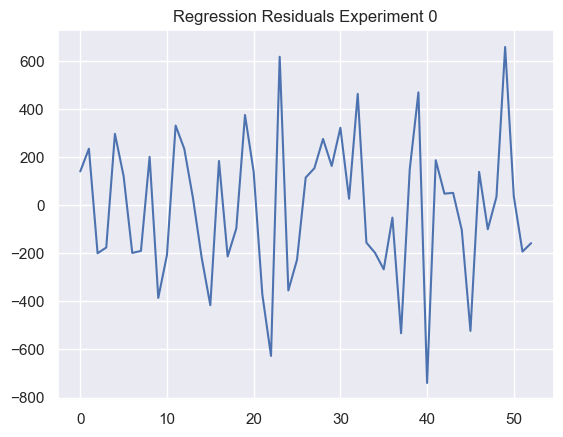

In [65]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task2\\with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = True

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, mape_test_list, _, _,_, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir )

print('RMSE with normalisation: ', rmse_test_list[0])
print('R-Squared with normalisation: ', rsq_test_list[0])
print('MAPE with normalisation: ', mape_test_list[0])

### Solution to Modelling Task 3

TASK: Develop a linear regression model with two selected input features from the data processing step. 

RMSE without normalisation:  362.0581603315175
R-Squared without normalisation:  0.6139250877212403
MAPE without normalisation:  3.1534884703704704


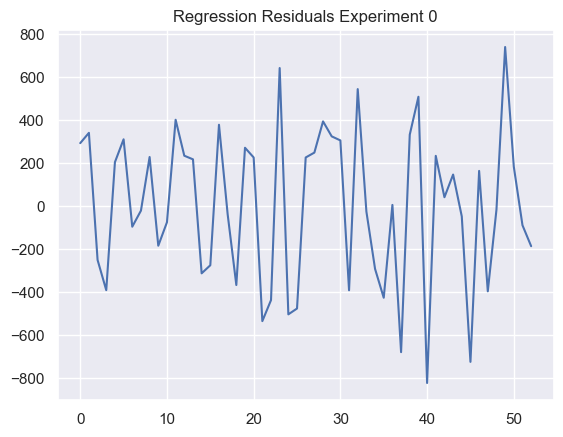

In [66]:
# Read data

# Create subset of features
df_features_subset = df_features[['degree_days','pv_capacity']]

# Prepare features and response
features = df_features_subset.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task3\\without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = False

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, mape_test_list, _, _,_, _, _, _, _, _, _, _, _, _  = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir )

print('RMSE without normalisation: ', rmse_test_list[0])
print('R-Squared without normalisation: ', rsq_test_list[0])
print('MAPE without normalisation: ', mape_test_list[0])

RMSE with normalisation:  533.2975116988292
R-Squared with normalisation:  0.1623665437630324
MAPE with normalisation:  4.405782900921099


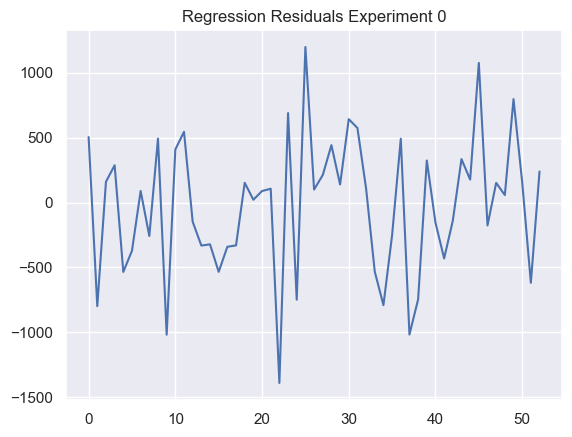

In [67]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task3\\with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 1
train_split = 0.6
norm_flag = True

# Execute Linear Regression experiment
rmse_test_list, _, _, rsq_test_list, _, _, mape_test_list, _, _,_, _, _, _, _, _, _, _, _, _ = run_experiments( 
                                                                        features, 
                                                                        response, 
                                                                        norm_flag, 
                                                                        max_experiments, 
                                                                        train_split,
                                                                        figure_dir )

print('RMSE with normalisation: ', rmse_test_list[0])
print('R-Squared with normalisation: ', rsq_test_list[0])
print('MAPE with normalisation: ', mape_test_list[0])

### Solution to Modelling Task 4

TASK: In each of the above investigations, run 30 experiments each and report the mean and std of the RMSE and R-squared score of the train and test datasets. Write a paragraph to compare your results of the different approaches taken. Note that if your code can't work for 30 experiments, only 1 experiment run is fine. You won't be penalised if you just do 1 experiment run.  

#### _30 Experiments using All Features Without Normalisation_

Mean RMSE of Test dataset without normalisation:  289.24873510297317
STD RMSE of Test dataset without normalisation:  40.50803032655083
Mean RMSE of Train dataset without normalisation:  279.3237256822309
STD RMSE of Train dataset without normalisation:  10.279186080148591
Mean R-squared of Test dataset without normalisation:  0.7582796836570626
STD R-squared of Test dataset without normalisation:  0.07166105688679239
Mean R-squared of Train dataset without normalisation:  0.7772931477507529
STD R-squared of Train dataset without normalisation:  0.017381821701606594
Mean MAPE of Test dataset without normalisation:  2.4723240859895297
STD MAPE of Test dataset without normalisation:  0.3537554441322411
Mean MAPE of Train dataset without normalisation:  2.325169639620426
STD MAPE of Train dataset without normalisation:  0.0953548028561823


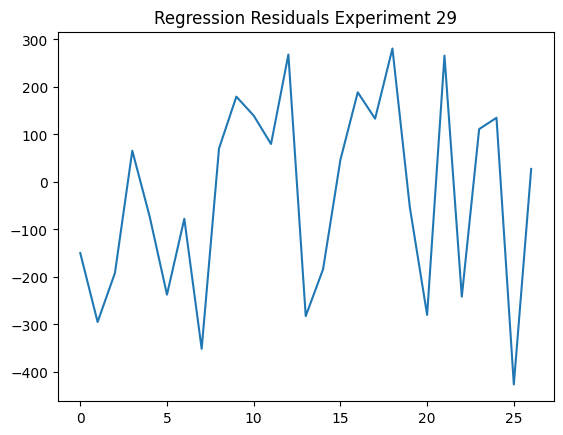

In [13]:
# Read data

# Prepare features and response
features = df_features.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\all_features_without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.8
norm_flag = False

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_mape_test, std_mape_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, \
    _, mean_mape_train, std_mape_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset without normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset without normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset without normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset without normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset without normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset without normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset without normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset without normalisation: ', std_rsq_train)
print('Mean MAPE of Test dataset without normalisation: ', mean_mape_test)
print('STD MAPE of Test dataset without normalisation: ', std_mape_test)
print('Mean MAPE of Train dataset without normalisation: ', mean_mape_train)
print('STD MAPE of Train dataset without normalisation: ', std_mape_train)

#### _30 Experiments using All Features With Normalisation_

Mean RMSE of Test dataset with normalisation:  270.2665296424299
STD RMSE of Test dataset with normalisation:  48.15847026899776
Mean RMSE of Train dataset with normalisation:  262.43597916441087
STD RMSE of Train dataset with normalisation:  12.020399409697646
Mean R-squared of Test dataset with normalisation:  0.7872146923951794
STD R-squared of Test dataset with normalisation:  0.07405250036095533
Mean R-squared of Train dataset with normalisation:  0.8032863138636697
STD R-squared of Train dataset with normalisation:  0.01851402079664718
Mean MAPE of Test dataset without normalisation:  2.2173080661896596
STD MAPE of Test dataset without normalisation:  0.36253626640019515
Mean MAPE of Train dataset without normalisation:  2.1158963536997626
STD MAPE of Train dataset without normalisation:  0.10271810672969559


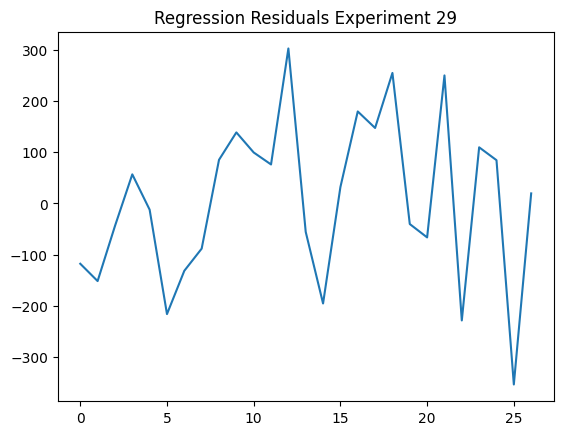

In [14]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\all_features_with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.8
norm_flag = True

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_mape_test, std_mape_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, \
    _, mean_mape_train, std_mape_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset with normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset with normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset with normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset with normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset with normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset with normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset with normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset with normalisation: ', std_rsq_train)
print('Mean MAPE of Test dataset without normalisation: ', mean_mape_test)
print('STD MAPE of Test dataset without normalisation: ', std_mape_test)
print('Mean MAPE of Train dataset without normalisation: ', mean_mape_train)
print('STD MAPE of Train dataset without normalisation: ', std_mape_train)

#### _30 Experiments using 2 Features Without Normalisation_

Mean RMSE of Test dataset without normalisation:  324.7426542888666
STD RMSE of Test dataset without normalisation:  30.177482384891345
Mean RMSE of Train dataset without normalisation:  317.7079261064658
STD RMSE of Train dataset without normalisation:  7.555766713831815
Mean R-squared of Test dataset without normalisation:  0.698002854069364
STD R-squared of Test dataset without normalisation:  0.07232020365498941
Mean R-squared of Train dataset without normalisation:  0.7120564370676807
STD R-squared of Train dataset without normalisation:  0.01624461435246147
Mean MAPE of Test dataset without normalisation:  2.8072106646859614
STD MAPE of Test dataset without normalisation:  0.2732807979373606
Mean MAPE of Train dataset without normalisation:  2.753849380421276
STD MAPE of Train dataset without normalisation:  0.08456994018833625


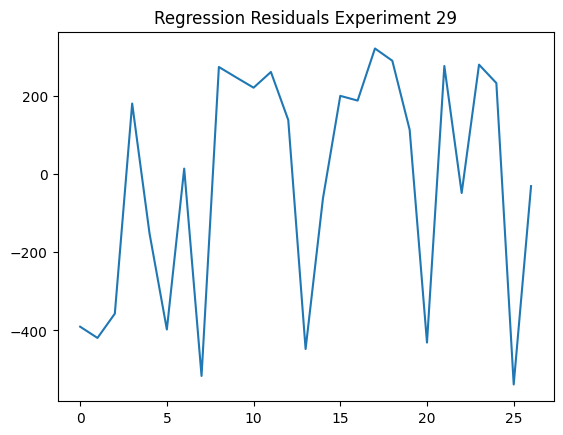

In [15]:
# Read data

# Create subset of features
df_features_subset = df_features[['degree_days','pv_capacity']]

# Prepare features and response
features = df_features_subset.to_numpy()
response = df_response.to_numpy()

# WITHOUT NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\2_features_without_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.8
norm_flag = False

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_mape_test, std_mape_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, \
    _, mean_mape_train, std_mape_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset without normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset without normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset without normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset without normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset without normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset without normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset without normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset without normalisation: ', std_rsq_train)
print('Mean MAPE of Test dataset without normalisation: ', mean_mape_test)
print('STD MAPE of Test dataset without normalisation: ', std_mape_test)
print('Mean MAPE of Train dataset without normalisation: ', mean_mape_train)
print('STD MAPE of Train dataset without normalisation: ', std_mape_train)

#### _30 Experiments using 2 Features With Normalisation_

Mean RMSE of Test dataset with normalisation:  612.3359367977249
STD RMSE of Test dataset with normalisation:  311.99478689015217
Mean RMSE of Train dataset with normalisation:  489.33334797454626
STD RMSE of Train dataset with normalisation:  16.732195247005237
Mean R-squared of Test dataset with normalisation:  -0.20587601106175138
STD R-squared of Test dataset with normalisation:  1.5754918489757814
Mean R-squared of Train dataset with normalisation:  0.3173461679243449
STD R-squared of Train dataset with normalisation:  0.039030877050980566
Mean MAPE of Test dataset without normalisation:  4.703370993907929
STD MAPE of Test dataset without normalisation:  1.218096912610774
Mean MAPE of Train dataset without normalisation:  4.248940574070441
STD MAPE of Train dataset without normalisation:  0.18193448645448795


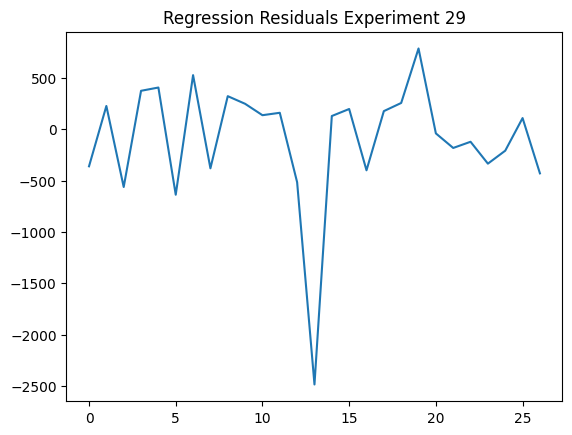

In [16]:
# WITH NORMALISATION

# Create directory for saving figure files
figure_dir = "fig\\linear_model\\task4\\2_features_with_norm\\"
mkdir_p(figure_dir)

# Set maximum number of experiments, train split ratio, normalisation flag
max_experiments = 30
train_split = 0.8
norm_flag = True

# Execute Linear Regression experiment
_, mean_rmse_test, std_rmse_test, \
    _, mean_rsq_test, std_rsq_test, \
    _, mean_mape_test, std_mape_test, \
    _, mean_rmse_train, std_rmse_train, \
    _, mean_rsq_train, std_rsq_train, \
    _, mean_mape_train, std_mape_train, _ = run_experiments(
                                                        features, 
                                                        response, 
                                                        norm_flag, 
                                                        max_experiments, 
                                                        train_split,
                                                        figure_dir )

print('Mean RMSE of Test dataset with normalisation: ', mean_rmse_test)
print('STD RMSE of Test dataset with normalisation: ', std_rmse_test)
print('Mean RMSE of Train dataset with normalisation: ', mean_rmse_train)
print('STD RMSE of Train dataset with normalisation: ', std_rmse_train)
print('Mean R-squared of Test dataset with normalisation: ', mean_rsq_test)
print('STD R-squared of Test dataset with normalisation: ', std_rsq_test)
print('Mean R-squared of Train dataset with normalisation: ', mean_rsq_train)
print('STD R-squared of Train dataset with normalisation: ', std_rsq_train)
print('Mean MAPE of Test dataset without normalisation: ', mean_mape_test)
print('STD MAPE of Test dataset without normalisation: ', std_mape_test)
print('Mean MAPE of Train dataset without normalisation: ', mean_mape_train)
print('STD MAPE of Train dataset without normalisation: ', std_mape_train)

OBSERVATIONS:
- From the results of Modelling Tasks 2 and 3, Normalisation reduces the error and improves the explicability of the model irrespective of the choice of features. 
- From the results of Modelling Tasks 2 and 3, the error is significantly increased, while explicability of model is significantly decreased, when we only select the 2 highest correlated features.  
- From the results of Modelling Task 4:
    - Across 30 experiments, using All Features, mean RMSE of Test (2.2348 without normalising/2.1847 with normalising) is slightly greater than that of Train (2.1835 without normalising/2.1540 with normalising), while the mean R-squared value of model in Test (0.5205 without normalising/0.5420 with normalising) is about the same as that of Train (0.5399 without normalising/0.5523 with normalising). This shows that impacts of impacts of overfitting are not significant.
    - Across 30 experiments, using 2 Features, mean RMSE of Test (2.5213 without normalising/2.4096 with normalising) is slightly greater than that of Train (2.5021 without normalising/2.3963 with normalising), while the mean R-squared value of model in Test (0.3900 without normalising/0.4429 with normalising) is about the same as that of Train (0.3959 without normalising/0.44589 with normalising). This shows that impacts of impacts of overfitting are not significant.  However, normalisation greatly improves the model's explicability in this case.
    - Similar to the single experiment tests, Normalisation improves the R-squared values and hence explicability of the models, while reducing the error in prediction. Reducing the number of features produces a significantly poorer model with lower R-squared measures and higher error measures.